In [1]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib notebook
%matplotlib notebook

%load_ext autoreload
%autoreload 2

In [2]:
with open('CHEXPERT/Chexpert_Train_DenseNet121_Complete.npy', 'rb') as f:
    X_train_0 = np.load(f)
    y_train_0 = np.load(f)
    data_dict = np.load(f,allow_pickle=True).item()
    
    
print(data_dict.keys())

filename_cxp = np.array(data_dict['filename'])
patient_id_cxp = data_dict['patient_id']
sex_cxp = data_dict['sex']
age_cxp = data_dict['age']
view_cxp = data_dict['view']

X_train_cxp = X_train_0
y_train_cxp = y_train_0

N_cxp = len(filename_cxp)

N_choose = 100
np.random.seed(222)
idxs = np.random.choice(N_cxp, N_choose, replace=False)

X_train_cxp_ch = X_train_cxp[idxs,:]
y_train_cxp_ch = np.ones(N_choose)
filename_cxp_ch = filename_cxp[idxs]

print(X_train_cxp_ch.shape, y_train_cxp_ch.shape)
print(filename_cxp_ch)

dict_keys(['filename', 'patient_id', 'sex', 'age', 'view'])
(100, 1024) (100,)
['CheXpert-v1.0-small/train/patient14157/study2/view2_lateral.jpg'
 'CheXpert-v1.0-small/train/patient01165/study7/view1_frontal.jpg'
 'CheXpert-v1.0-small/train/patient52220/study1/view1_frontal.jpg'
 'CheXpert-v1.0-small/train/patient27022/study2/view2_lateral.jpg'
 'CheXpert-v1.0-small/train/patient49927/study2/view2_lateral.jpg'
 'CheXpert-v1.0-small/train/patient11703/study5/view1_frontal.jpg'
 'CheXpert-v1.0-small/train/patient03258/study1/view1_frontal.jpg'
 'CheXpert-v1.0-small/train/patient42531/study3/view1_frontal.jpg'
 'CheXpert-v1.0-small/train/patient38697/study2/view1_frontal.jpg'
 'CheXpert-v1.0-small/train/patient04731/study2/view1_frontal.jpg'
 'CheXpert-v1.0-small/train/patient34724/study3/view1_frontal.jpg'
 'CheXpert-v1.0-small/train/patient01489/study27/view1_frontal.jpg'
 'CheXpert-v1.0-small/train/patient30443/study1/view1_frontal.jpg'
 'CheXpert-v1.0-small/train/patient02296/study1/v

In [ ]:
from imageio import imread 

filename_prefix = "CHEXPERT/"

k = 0

plt.figure(figsize=[10,10])

for i in range(10):
    for j in range(10):
        IMG = imread(filename_prefix+filename_cxp_ch[k], as_gray=False, pilmode="RGB")
        k=k+1
        
        plt.subplot(10,10,k)
        plt.xticks([])
        plt.yticks([])
        
        plt.imshow(IMG)

plt.savefig('MURA_Chest_Xrays.png', bbox_inches='tight')

#plots grid of CXR images

In [4]:
with open('MURA_Train_DenseNet121_Complete.npy', 'rb') as f:
    X_train_0 = np.load(f)
    y_train_0 = np.load(f)
    data_dict = np.load(f,allow_pickle=True).item()
    
    
print(data_dict.keys())

filename_mura = np.array(data_dict['filename'])
patient_id_mura = data_dict['patient_id']
view_mura = data_dict['view']
view_label_mura = data_dict['view_label']

print(view_label_mura)

X_train_mura = X_train_0
y_train_mura = y_train_0

N_mura = len(filename_mura)

view_select = 2 #Finger

X_train_mura_ch = X_train_mura[view_mura==view_select]
filename_mura_ch = filename_mura[view_mura==view_select]
N_mura = len(filename_mura_ch)
y_train_mura_ch = np.zeros(N_mura)


print(X_train_mura_ch.shape, y_train_mura_ch.shape)

dict_keys(['filename', 'patient_id', 'view', 'view_label'])
['SHOULDER', 'HUMERUS', 'FINGER', 'ELBOW', 'WRIST', 'FOREARM', 'HAND']
(5106, 1024) (5106,)


In [5]:
X_train = np.concatenate((X_train_mura_ch,X_train_cxp_ch))
y_train = np.concatenate((y_train_mura_ch,y_train_cxp_ch))
filename = np.concatenate((filename_mura_ch,filename_cxp_ch))

print(X_train.shape, y_train.shape, filename.shape)


X_train = np.concatenate((X_train_cxp_ch, X_train_mura_ch))
y_train = np.concatenate((y_train_cxp_ch, y_train_mura_ch))
filename = np.concatenate((filename_cxp_ch, filename_mura_ch))

print(X_train.shape, y_train.shape, filename.shape)

(5206, 1024) (5206,) (5206,)
(5206, 1024) (5206,) (5206,)


In [ ]:
import umap 
 
    
import matplotlib.pyplot as plt
#%matplotlib inline
    
np.random.seed(100) 
ump = umap.UMAP(n_neighbors=10, 
        min_dist=0.001, 
        #spread = ,
        n_components=2, 
        random_state=150, 
        n_epochs = 300,
        metric= 'euclidean') 
 
y_umap = ump.fit_transform(X_train) 
 
plt.figure() 
plt.scatter(y_umap[:,0], y_umap[:,1], c=y_train, s=1, cmap='Spectral') 
 
#cbar = plt.colorbar(boundaries=np.arange(3)-0.5) 
#cbar.set_ticks(np.arange(3)) 
#cbar.set_ticklabels(classes) 

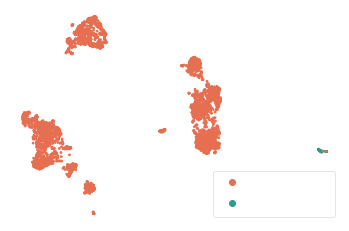

In [7]:
from matplotlib.colors import ListedColormap
cmp = ListedColormap(['#E76F51', '#2A9D8F', ])

plt.figure() 
scatter = plt.scatter(y_umap[:,0], y_umap[:,1], c=y_train, s=3, cmap=cmp) 

handles, labels = scatter.legend_elements()
#handles = [handles[0], handles[2], handles[1]]
#labels = [labels[0], labels[1], labels[2]]

plt.axis('off')

lgd = plt.legend(handles, labels,
                    loc="lower right", prop={'size': 14})
lgd.get_texts()[0].set_text('                ') #Finger
lgd.get_texts()[1].set_text('                ') #Chest
lgd.get_frame().set_alpha(None)
lgd.get_frame().set_facecolor((0, 0, 1, 0))
lgd.get_frame().set_edgecolor((0,0,0,0.1))

plt.savefig('MURA_seeding/MURA_seeding1.tif', dpi=1200, transparent=True)

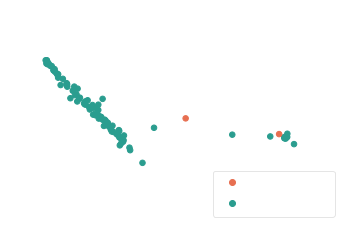

In [8]:
plt.figure() 
scatter = plt.scatter(y_umap[:,0], y_umap[:,1], c=y_train, s=30, cmap=cmp) 

handles, labels = scatter.legend_elements()
#handles = [handles[0], handles[2], handles[1]]
#labels = [labels[0], labels[1], labels[2]]

dx=-0.1

plt.xlim([17-dx, 17.9-dx])
plt.ylim([0.5, 1])

plt.axis('off')

lgd = plt.legend(handles, labels,
                    loc="lower right", prop={'size': 14})
lgd.get_texts()[0].set_text('                ') #Finger
lgd.get_texts()[1].set_text('                ') #Chest
lgd.get_frame().set_alpha(None)
lgd.get_frame().set_facecolor((0, 0, 1, 0))
lgd.get_frame().set_edgecolor((0,0,0,0.1))

plt.savefig('MURA_seeding/MURA_seeding2.tif', dpi=1200, transparent=True)

In [9]:
#x=[16.75, 18.25], y=[0.25, 1.25]


In [10]:
from imageio import imread 

def get_indexes_within(y_umap,x,y):
    xmin = x[0]
    xmax = x[1]
    ymin = y[0]
    ymax = y[1]
    
    idx1 = (y_umap[:,0] > xmin) & (y_umap[:,0] < xmax)
    idx2 = (y_umap[:,1] > ymin) & (y_umap[:,1] < ymax)
    
    idx = idx1 & idx2
    
    return idx

from imageio import imread 

def plot_within_region_muracxp(y_umap,filename,x,y,no_of_plots=4):

    idxs = get_indexes_within(y_umap,x=x, y=y)

    fnames = filename[idxs]
    sub_y_umap = y_umap[idxs]

    print('Total number of points in this region: ', len(fnames))

    for i in range(len(fnames)):
        print(i, fnames[i])
        img = imread(fnames[i], as_gray=False, pilmode="RGB") 
        plt.figure()
        plt.imshow(img) 
        plt.axis('off')
        plt.savefig('MURA_seeding/MURA_seeding_Lateral'+str(i)+'.svg', transparent=True)



Total number of points in this region:  2
0 MURA-v1.1/train/XR_FINGER/patient04547/study1_negative/image1.png
1 MURA-v1.1/train/XR_FINGER/patient04547/study1_negative/image5.png


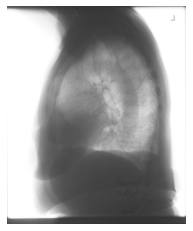

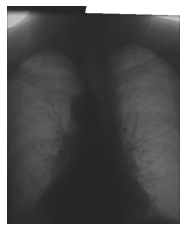

In [11]:
#x=[11.8, 12.6], y=[3.75, 5.00]
plot_within_region_muracxp(y_umap[N_choose:],filename[N_choose:],x=[16.75, 18.25], y=[0.25, 1.25])

In [ ]:
def plot_random(y_umap,filename,seed,no_of_plots=4):
    np.random.seed(seed)
    idxs = np.random.permutation(len(filename))

    fnames = filename[idxs]
    sub_y_umap = y_umap[idxs]

    print('Total number of points in this region: ', len(fnames))

    for i in range(len(fnames)):
        if i<no_of_plots:
            print(i, ':', sub_y_umap[i], fnames[i])
            img = imread(fnames[i], as_gray=False, pilmode="RGB") 
            plt.figure()
            plt.imshow(img)
            plt.axis('off')
            plt.savefig('MURA_seeding/MURA_seeding_hand'+str(i)+'.svg', transparent=True)

#x=[11.8, 12.6], y=[3.75, 5.00]
plot_random(y_umap[N_choose:],filename[N_choose:],seed=100)

#plots random finger images

In [13]:
print(umap.__version__)

0.4.6
